<a href="https://colab.research.google.com/github/Koliadenko/Covid-monitoring-in-Italy/blob/main/Covid_in_Italia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciao!

Si tratta di un semplice strumento per monitorare la situazione del Covid-19 in varie regioni d'Italia

Per eseguirlo, è necessario premere il pulsante "Runtime" -> "Esegui tutto"

L'elaborazione richiede solitamente fino a 2 minuti

---


Hi!

This is a simple tool to monitor the Covid-19 situation in various regions of Italy

To run it, you need to press on the button "Runtime" -> "Run all"

The processing usually takes up to 2 minutes


In [ ]:
# import most of needed libs (it's actually better to import it the first time when you use it)
import numpy as np
import pandas as pd
np.random.seed(12345)
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [ ]:
# import some stuff from datetime and create a custom function
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [ ]:
# Array creating

start_date = date(2020, 9 , 23)
end_date = date.today()

num_of_days = int((end_date - start_date).days) + 1

day = []

for single_date in daterange(start_date, end_date):
    day.append(single_date.strftime("%m-%d-%Y"))

In [ ]:
#day

In [ ]:
# The coolest stuff. Loading of the data
df_all = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv', error_bad_lines=False)
df_all['Date'] = '2020-01-22'

for i in day:
    
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+i+'.csv'
    df = pd.read_csv(url, error_bad_lines=False)

    df['Date'] = i[6:10]+'-'+i[0:2]+'-'+i[3:5]

    df_all = pd.concat([df_all,df])

In [ ]:
# reorder an the array of dates in order for it to be consistent with the standart format // to use it as dates later
from datetime import datetime

day = [datetime.strptime(i,"%m-%d-%Y").strftime('%Y-%m-%d') for i in day]
#day

In [ ]:
#df_all

In [ ]:
ita_regions = list(df_all[df_all['Country_Region'] == 'Italy']['Province_State'].unique())
#cleanedList = [x for x in countries if str(x) != 'nan']
try:
    ita_regions.remove('NaN')
except:
    pass
try:
    ita_regions.remove('Unknown')
except:
    pass
df_italy = df_all[df_all['Province_State'].isin(ita_regions)]
result_italy = pd.DataFrame(day)
#print(ita_regions)

for k in ita_regions:

    df_reg = df_italy[df_italy['Province_State'] == k]
    df_reg['Confirmed_Shifted'] = df_reg['Confirmed'].shift(1)
    df_reg = df_reg[['Date','Confirmed', 'Confirmed_Shifted']]
    df_reg[k] = df_reg['Confirmed'] - df_reg['Confirmed_Shifted']
    
    result_italy = result_italy.merge(df_reg, left_on=0, right_on='Date', how='left')
    
result_italy = result_italy[[0]+ita_regions].fillna(0)


#result_italy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# I am not proud of it
region_to_population = {
    'Abruzzo'               : 1305770,
    'Basilicata'            : 556934,
    'Calabria'              : 1924701,
    'Campania'              : 5785861,
    'Emilia-Romagna'        : 4467118,
    'Friuli Venezia Giulia' : 1211357,
    'Lazio'                 : 5865544,
    'Liguria'               : 1543127,
    'Lombardia'             : 10103969,
    'Marche'                : 1518400,
    'Molise'                : 302265,
    'P.A. Bolzano'          : 1074819/2,        #sorry for that
    'P.A. Trento'           : 1074819/2,
    'Piemonte'              : 4341375,
    'Puglia'                : 4008296,
    'Sardegna'              : 1630474,
    'Sicilia'               : 4968410,
    'Toscana'               : 3722729, 
    'Umbria'                : 880285,
    "Valle d'Aosta"         : 125501,
    'Veneto'                : 4907704	
    }

# ***Allora***

Nei grafici sottostanti è possibile osservare il numero di nuovi casi per 100000 abitanti al giorno a sinistra. (per ciascuna regione rispettivamente)

Linea **rossa**: casi segnalati **quotidianamente**. Linea **nera**: casi giornalieri **smussati** su un intervallo di una settimana. Linea **blu** - una linea di **riferimento** che corrisponde in media a 60 nuovi casi ogni 100000 abitanti al giorno.

A destra si può osservare la derivata dei nuovi casi, la cosiddetta **"velocità"** del cambiamento.

La linea nera qui è una linea di riferimento importante, poiché separa le situazioni in cui "migliora" e quando "peggiora".

Ad esempio, se la linea verde è sopra, significa che il numero di casi giornalieri sta crescendo in media.

---

On the graphs below you can observe the number of new cases per 100000 of population per day on the left. (for each region respectively)

**Red** line - cases reported **daily**. **Black** line - daily cases **smoothed** on a week interval. **Blue** line - a **reference** line which corresponds to 60 new cases per 100000 of population a day on average.

On the right you can observe the derivative of new cases, the so-called **"speed"** of change.

The black line here is an important reference line, as it separates the situations when it "gets better" and when it "gets worse".

For instance, if the green line is above - it means that the number of daily cases is growing on average.

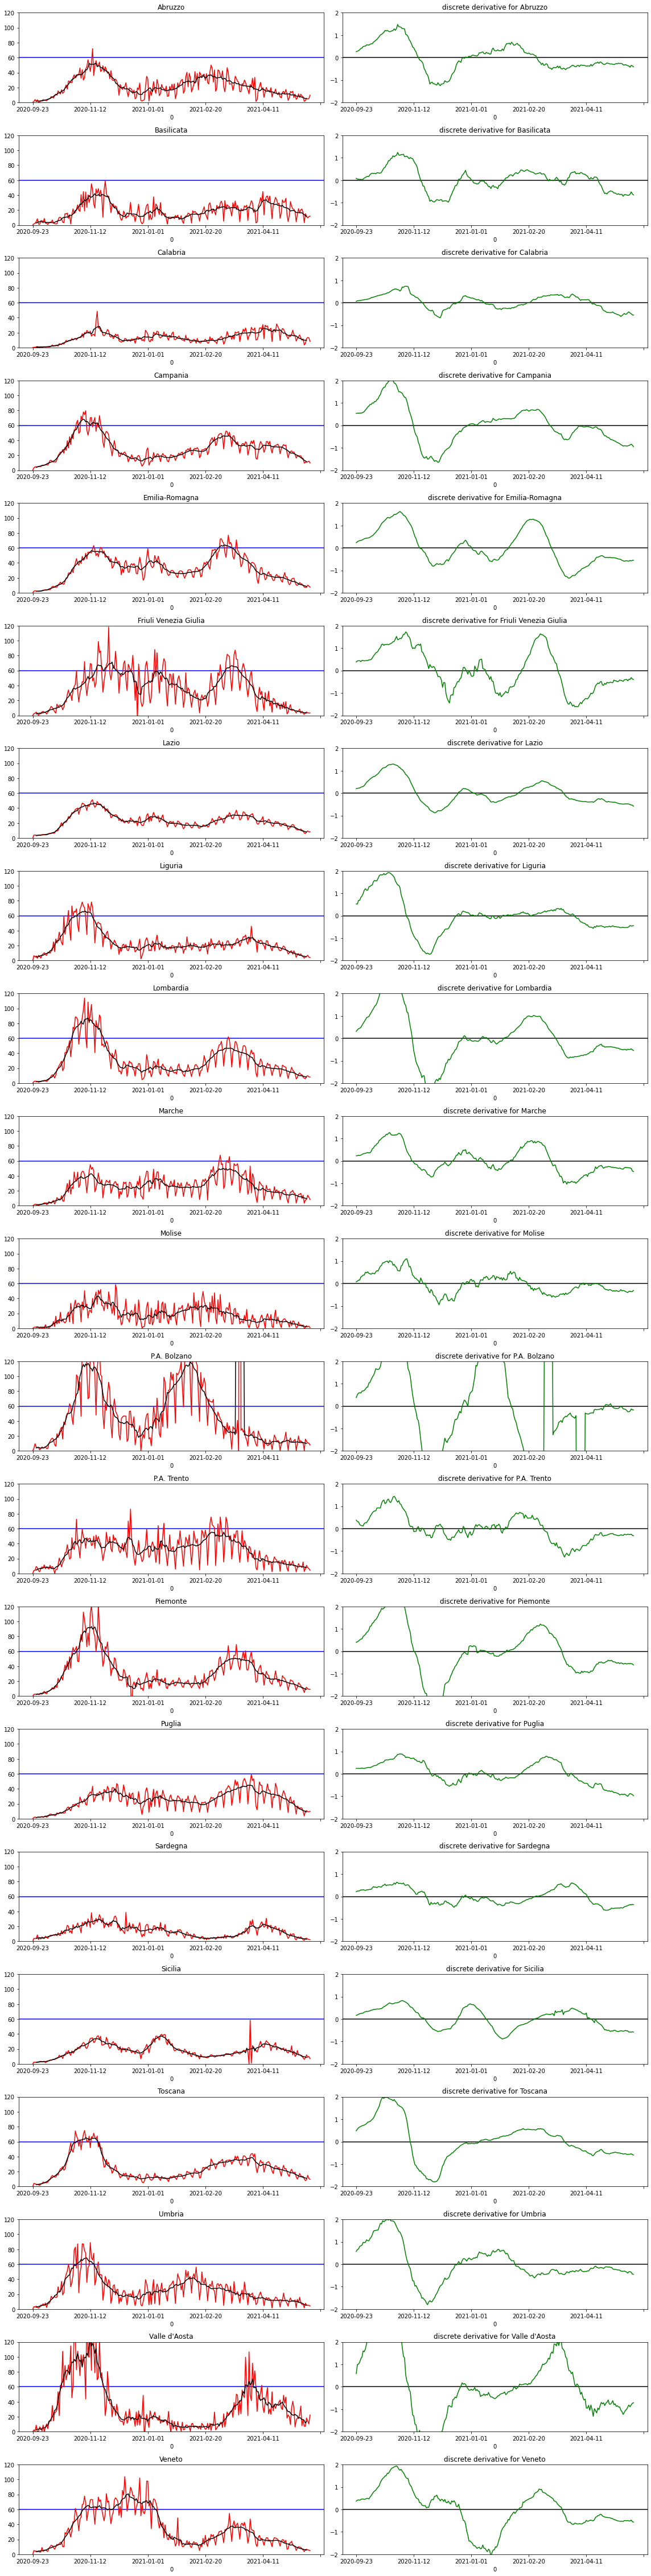

In [ ]:
import matplotlib.dates as mdates
# make copies, set indices to dates
temp_result_italy = result_italy.copy()
temp_result_italy.set_index(0, inplace=True)
 
 
 
fig, axes = plt.subplots(len(ita_regions), 2, figsize=(16, 63))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
 
#for ax in axes.flat:
#    ax.label_outer()
 
for i in range(len(ita_regions)):
    name = ita_regions[i]
    axes[i,0].set_title(name)
    axes[i,1].set_title('discrete derivative for '+name)
    
    #axes[i,0].label_outer()
    #axes[i,1].label_outer()
    axes[i,0].set_ylim([0, 120])
    axes[i,1].set_ylim([-2, 2])
    axes[i,0].axhline(60, c='b')
    axes[i,1].axhline(c='k')
    
    #axes[i].plot(temp_result_italy[name])#, color=next(colors), label=name); ax1.legend(loc='best')
    new_cases_per_capita = temp_result_italy[name]/region_to_population[name]
    new_cases_per_100000 = new_cases_per_capita * 100000
    new_cases_per_100000.plot(ax=axes[i,0], style='r')
    smoothed = new_cases_per_100000.rolling(window=7, min_periods=7, center=True).mean()
    smoothed.plot(ax=axes[i,0], style='k')
 
    diff1 = smoothed - smoothed.shift(1)
    diff1.rolling(window=28, min_periods=1, center=True).mean().plot(ax=axes[i,1], style='g-')
 
    
    #axes.plot(tempo, color=next(colors), label=name); ax1.legend(loc='best')
fig.tight_layout()